<a href="https://colab.research.google.com/github/Nlasry1996/Nautica-Home/blob/main/FamilyItemPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/Nlasry1996/Nautica-Home.git # Connect to Github


fatal: destination path 'Nautica-Home' already exists and is not an empty directory.


Loading the Table

In [2]:
import numpy as np
import pandas as pd
df= pd.read_csv('/content/Nautica-Home/NHDataset - NHDataset.csv')
df

,Order_Date,Customer_ID,Order_ID,Quantity,City,District,Catalog_Number,Hebrew_Description,English_Description,Added_Date,Family_Item_ID,Family_Item_Name,Sales_Price_No_VAT,Sales_Price_With_VAT,Cost_Price,Cost_Import_USD,Cost_Production_USD,Size,Color_ID,Color_Name
0,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHD1001-15-2,ינג כחול כיסוי 100% כותנה במילוי מיקרופייבר 40...,400GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,שמיכות,שמיכות,427,499,15,0,0,150/200,2,PAGEANT BLUE
1,4/3/2022,100110,SO22000098,3,Ir ha-Karmel,חיפה,NHD1002-15-2,שמיכת פוך פייפינג כיסוי 100% כותנה מיקרופייבר ...,600GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,שמיכות,שמיכות,469,549,17,0,0,150/200,2,PAGEANT BLUE
2,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3004-15-16,מגבת גוף אפור כהה 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,מגבות,מגבות אקווה פיברו,196,229,10,0,0,90/150,16,Bruschetta
3,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3005-15-26,מגבת גוף טורקיז 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,מגבות,מגבות אקווה פיברו,196,229,10,0,0,90/150,26,Peach Bud
4,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3006-15-23,מגבת פסים 150X90 כחול 600 גר',STRIPE TOWEL 150X90 BLUE 600 GSM,12/15/2021,מגבות,מגבות אקווה פיברו,213,249,10,0,0,150/90,23,China Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9156,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71002M8,OCEAN M Mix&Match women tank,"Mix&Match women tank,,M",11/10/2021,7000,Loungewear,102,119,5,0,5,M,8,Lolipop
9157,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71003L6,-PEACH-L-Mix&Match women shorts,NaN,10/27/2021,7000,Loungewear,110,129,5,0,5,L,6,Cartouch
9158,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71003L8,-OCEAN-L-Mix&Match women shorts,NaN,10/27/2021,7000,Loungewear,110,129,5,0,5,L,8,Lolipop
9159,4/30/2023,103231,SO23001624,1,Kiryat-Motzkin,חיפה,NHB1006-16-13,"סט 100% כותנה סטן 220 160 סמ BASIC L. BLUE""",NaN,3/1/2022,220B,סאטן 220 בסיק,512,599,28,28,0,160/200,13,L. PINK


Delete unrelevant columns

In [3]:
df=df.drop(['Added_Date','Customer_ID','City',	'District','Hebrew_Description','English_Description','Cost_Import_USD'	,'Cost_Production_USD','Size','Color_ID','Color_Name','Sales_Price_With_VAT','Sales_Price_No_VAT','Cost_Price'], axis=1)

df

,Order_Date,Order_ID,Quantity,Catalog_Number,Family_Item_ID,Family_Item_Name
0,4/3/2022,SO22000098,1,NHD1001-15-2,שמיכות,שמיכות
1,4/3/2022,SO22000098,3,NHD1002-15-2,שמיכות,שמיכות
2,4/3/2022,SO22000098,1,NHT3004-15-16,מגבות,מגבות אקווה פיברו
3,4/3/2022,SO22000098,1,NHT3005-15-26,מגבות,מגבות אקווה פיברו
4,4/3/2022,SO22000098,1,NHT3006-15-23,מגבות,מגבות אקווה פיברו
...,...,...,...,...,...,...
9156,4/30/2023,SO23001622,1,NLW-71002M8,7000,Loungewear
9157,4/30/2023,SO23001622,1,NLW-71003L6,7000,Loungewear
9158,4/30/2023,SO23001622,1,NLW-71003L8,7000,Loungewear
9159,4/30/2023,SO23001624,1,NHB1006-16-13,220B,סאטן 220 בסיק


Convert Date to DateType


In [4]:
df['Order_Date'] = pd.to_datetime(df['Order_Date']) # Convert 'Order_Date' to a datetime format.
df['Month'] = df['Order_Date'].dt.month #Extract the month feature.
df=df.drop(['Order_Date'], axis=1)
df

,Order_ID,Quantity,Catalog_Number,Family_Item_ID,Family_Item_Name,Month
0,SO22000098,1,NHD1001-15-2,שמיכות,שמיכות,4
1,SO22000098,3,NHD1002-15-2,שמיכות,שמיכות,4
2,SO22000098,1,NHT3004-15-16,מגבות,מגבות אקווה פיברו,4
3,SO22000098,1,NHT3005-15-26,מגבות,מגבות אקווה פיברו,4
4,SO22000098,1,NHT3006-15-23,מגבות,מגבות אקווה פיברו,4
...,...,...,...,...,...,...
9156,SO23001622,1,NLW-71002M8,7000,Loungewear,4
9157,SO23001622,1,NLW-71003L6,7000,Loungewear,4
9158,SO23001622,1,NLW-71003L8,7000,Loungewear,4
9159,SO23001624,1,NHB1006-16-13,220B,סאטן 220 בסיק,4


Insert in the Table 3 Derive Features

In [5]:
#Count the number of times this article was bought
df_catalognumber_orders = df.groupby('Catalog_Number')['Order_ID'].count().reset_index()
df_catalognumber_orders = df_catalognumber_orders.rename(columns={'Order_ID': 'Count_Times_Articles_Appears'})
# Merge the derived feature back into the original DataFrame
df = pd.merge(df, df_catalognumber_orders, on='Catalog_Number', how='left')
#Count of how many article were sell in this Item Family
df_family_item_orders = df.groupby('Family_Item_Name')['Order_ID'].count().reset_index()
df_family_item_orders = df_family_item_orders.rename(columns={'Order_ID': 'Number_FI_per_Year'})
# Merge the derived feature back into the original DataFrame
df = pd.merge(df, df_family_item_orders, on='Family_Item_Name', how='left')
#How many of these items are sold by month
df['Family_Item_Count_Monthly'] = df.groupby(['Month', 'Family_Item_ID'])['Order_ID'].transform('count')
#How many people bought per month
df['Total_Customers_per_Month']= df.groupby('Month')['Order_ID'].transform('count')
df

,Order_ID,Quantity,Catalog_Number,Family_Item_ID,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly,Total_Customers_per_Month
0,SO22000098,1,NHD1001-15-2,שמיכות,שמיכות,4,58,371,36,1110
1,SO22000098,3,NHD1002-15-2,שמיכות,שמיכות,4,65,371,36,1110
2,SO22000098,1,NHT3004-15-16,מגבות,מגבות אקווה פיברו,4,29,984,140,1110
3,SO22000098,1,NHT3005-15-26,מגבות,מגבות אקווה פיברו,4,33,984,140,1110
4,SO22000098,1,NHT3006-15-23,מגבות,מגבות אקווה פיברו,4,19,984,140,1110
...,...,...,...,...,...,...,...,...,...,...
9156,SO23001622,1,NLW-71002M8,7000,Loungewear,4,13,2786,248,1110
9157,SO23001622,1,NLW-71003L6,7000,Loungewear,4,5,2786,248,1110
9158,SO23001622,1,NLW-71003L8,7000,Loungewear,4,3,2786,248,1110
9159,SO23001624,1,NHB1006-16-13,220B,סאטן 220 בסיק,4,10,618,78,1110


Drop unrelevant columns

In [6]:
df=df.drop(['Order_ID','Catalog_Number','Family_Item_ID'],axis=1)
df

,Quantity,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly,Total_Customers_per_Month
0,1,שמיכות,4,58,371,36,1110
1,3,שמיכות,4,65,371,36,1110
2,1,מגבות אקווה פיברו,4,29,984,140,1110
3,1,מגבות אקווה פיברו,4,33,984,140,1110
4,1,מגבות אקווה פיברו,4,19,984,140,1110
...,...,...,...,...,...,...,...
9156,1,Loungewear,4,13,2786,248,1110
9157,1,Loungewear,4,5,2786,248,1110
9158,1,Loungewear,4,3,2786,248,1110
9159,1,סאטן 220 בסיק,4,10,618,78,1110


Label Encoder for FamilyItemName

In [7]:
from sklearn.preprocessing import LabelEncoder # Encode Categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['Family_Item_Name'] = label_encoder.fit_transform(df['Family_Item_Name'])

df

,Quantity,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly,Total_Customers_per_Month
0,1,15,4,58,371,36,1110
1,3,15,4,65,371,36,1110
2,1,4,4,29,984,140,1110
3,1,4,4,33,984,140,1110
4,1,4,4,19,984,140,1110
...,...,...,...,...,...,...,...
9156,1,1,4,13,2786,248,1110
9157,1,1,4,5,2786,248,1110
9158,1,1,4,3,2786,248,1110
9159,1,10,4,10,618,78,1110


Check Corellation

In [8]:
df.corr()

,Quantity,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly,Total_Customers_per_Month
Quantity,1.000000,0.083071,0.011745,0.037236,-0.177185,-0.126853,-0.023945
Family_Item_Name,0.083071,1.000000,0.194402,0.125043,-0.731806,-0.472360,-0.056866
Month,0.011745,0.194402,1.000000,0.143433,-0.290608,-0.417169,-0.046084
Count_Times_Articles_Appears,0.037236,0.125043,0.143433,1.000000,-0.304325,-0.218558,-0.035058
Number_FI_per_Year,-0.177185,-0.731806,-0.290608,-0.304325,1.000000,0.657557,0.071119
Family_Item_Count_Monthly,-0.126853,-0.472360,-0.417169,-0.218558,0.657557,1.000000,0.433566
Total_Customers_per_Month,-0.023945,-0.056866,-0.046084,-0.035058,0.071119,0.433566,1.000000


New Table

In [9]:
import pandas as pd

# Create the new table by grouping and summing the 'Family_Item_Count_Monthly' column
summary_table = df.groupby(['Family_Item_Name', 'Month'])['Family_Item_Count_Monthly'].count().reset_index()

# Display the summary table
print(summary_table)




     Family_Item_Name  Month  Family_Item_Count_Monthly
0                   0      1                          2
1                   0      2                         16
2                   0      3                          3
3                   0      4                          3
4                   0      6                          2
..                ...    ...                        ...
176                16      8                         20
177                16      9                         18
178                16     10                          4
179                16     11                         26
180                16     12                          9

[181 rows x 3 columns]


In [10]:
import pandas as pd

# Create the new table by grouping and summing the 'Family_Item_Count_Monthly' column
summary_table = df.groupby(['Family_Item_Name', 'Month'])['Family_Item_Count_Monthly'].count().reset_index()

# Display the summary table
print(summary_table)


     Family_Item_Name  Month  Family_Item_Count_Monthly
0                   0      1                          2
1                   0      2                         16
2                   0      3                          3
3                   0      4                          3
4                   0      6                          2
..                ...    ...                        ...
176                16      8                         20
177                16      9                         18
178                16     10                          4
179                16     11                         26
180                16     12                          9

[181 rows x 3 columns]


Graph to check Trend

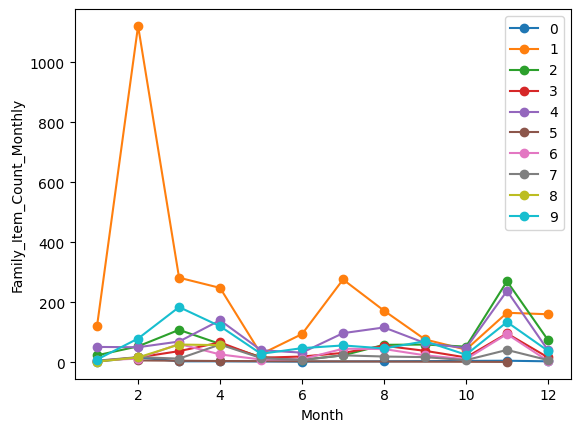

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to map each family item to a unique color
family_colors = {item: color for item, color in zip(summary_table['Family_Item_Name'].unique(), plt.cm.tab10.colors)}

# Plot the graph
fig, ax = plt.subplots()

# Iterate through each family item in the summary table
for item, color in family_colors.items():
    # Filter the summary table for the specific family item
    data = summary_table[summary_table['Family_Item_Name'] == item]

    # Plot the data points for the family item with the corresponding color
    ax.plot(data['Month'], data['Family_Item_Count_Monthly'], marker='o', label=item, color=color)

# Set the x-axis label and tick labels
ax.set_xlabel('Month')

# Set the y-axis label and tick labels
ax.set_ylabel('Family_Item_Count_Monthly')

# Set the legend
ax.legend()

# Show the graph
plt.show()


Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df.drop('Family_Item_Count_Monthly', axis=1).values  # independent variable
y = df['Family_Item_Count_Monthly'].values  # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X, y)

model.fit(X_train, y_train)

predictions = model.predict(X_test)


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Predictions:", predictions)

Coefficients: [ -8.91273267   0.53725438 -22.27728816  -0.04958462   0.18663266
   0.26727178]
Intercept: -140.94344959447045
Predictions: [ 24.62742775 249.56462155 402.55259534 ... 729.95607296 403.2304539
 -41.53850255]


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, predictions)
print("MSE:" ,mse)



MSE: 42167.24672121314


XGBOOST

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = df.drop(['Family_Item_Count_Monthly'], axis=1)
y = df['Family_Item_Count_Monthly']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the XGBoost regression model
model = xgb.XGBRegressor()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[ 115.88478   184.05249   171.9824   ... 1122.0134    275.89993
   46.984028]
(1833,)


Predict all the values

In [15]:
all_pred=model.predict(X).round()
print(all_pred)
df.insert(loc=7,column='Predictions_FI',value=all_pred)
df

[ 36.  36. 140. ... 248.  78.  78.]


,Quantity,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly,Total_Customers_per_Month,Predictions_FI
0,1,15,4,58,371,36,1110,36.0
1,3,15,4,65,371,36,1110,36.0
2,1,4,4,29,984,140,1110,140.0
3,1,4,4,33,984,140,1110,140.0
4,1,4,4,19,984,140,1110,140.0
...,...,...,...,...,...,...,...,...
9156,1,1,4,13,2786,248,1110,248.0
9157,1,1,4,5,2786,248,1110,248.0
9158,1,1,4,3,2786,248,1110,248.0
9159,1,10,4,10,618,78,1110,78.0


Evaluating our Model

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Evaluating the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2_score:",r2_score(y_test, y_pred))

Mean Squared Error: 0.1933495741399452
R2_score: 0.9999983281339896


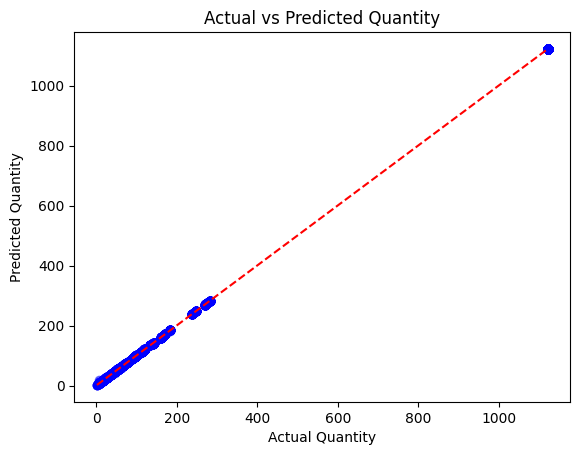

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity')
plt.show()

Cross-Validation using K-Fold Method

In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Splitting the data into features (X) and target variable (y)
X = df.drop(['Family_Item_Count_Monthly'], axis=1)
y = df['Family_Item_Count_Monthly']

# Define the number of folds
k = 5

# Create an instance of KFold with k folds
kf = KFold(n_splits=k)

# Initialize a list to store the evaluation scores
scores = []

# Iterate over each fold
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Creating the XGBoost regression model
    model = XGBRegressor()

    # Train your model on the training data
    model.fit(X_train, y_train)

    # Evaluate your model on the validation data
    y_pred = model.predict(X_val)
    score = r2_score(y_val, y_pred)

    # Store the evaluation score
    scores.append(score)

# Calculate the average score
average_score = np.mean(scores)

# Print the average score
print("Average Score:", average_score)


Average Score: 0.999868575780997


Graph of Cross-Validation

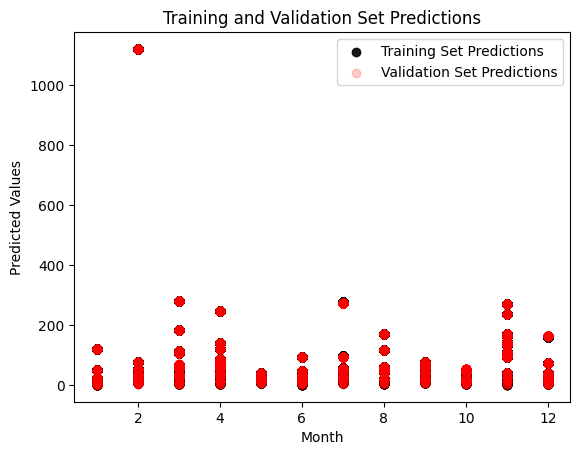

In [25]:
from numpy.ma.core import size
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

X = df.drop(['Family_Item_Count_Monthly'], axis=1)
y = df['Family_Item_Count_Monthly']

# Define the number of folds
k = 5

# Create an instance of KFold with k folds
kf = KFold(n_splits=k)

# Initialize arrays to store predictions and corresponding months
predictions_train = []
predictions_val = []
months_train = []
months_val = []

# Iterate over each fold
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Creating the XGBoost regression model
    model = XGBRegressor()

    # Train your model on the training data
    model.fit(X_train, y_train)

    # Store the predictions and corresponding months for the training set
    predictions_train.append(model.predict(X_train))
    months_train.append(X_train['Month'])

    # Store the predictions and corresponding months for the validation set
    predictions_val.append(model.predict(X_val))
    months_val.append(X_val['Month'])

# Concatenate the predictions and months arrays
predictions_train = np.concatenate(predictions_train)
predictions_val = np.concatenate(predictions_val)
months_train = np.concatenate(months_train)
months_val = np.concatenate(months_val)

# Plot the training set predictions
plt.scatter(months_train, predictions_train, color='black',alpha=0.9, label='Training Set Predictions',)

# Plot the validation set predictions
plt.scatter(months_val, predictions_val, color='red',alpha=0.2 ,label='Validation Set Predictions',)




# Set labels and title
plt.xlabel('Month')
plt.ylabel('Predicted Values')
plt.title('Training and Validation Set Predictions')

# Add legend
plt.legend()

# Show the plot
plt.show()


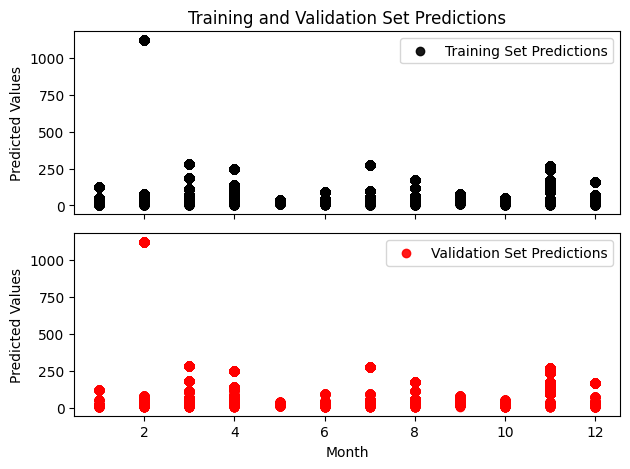

In [27]:
from numpy.ma.core import size
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

X = df.drop(['Family_Item_Count_Monthly'], axis=1)
y = df['Family_Item_Count_Monthly']

# Define the number of folds
k = 5

# Create an instance of KFold with k folds
kf = KFold(n_splits=k)

# Initialize arrays to store predictions and corresponding months
predictions_train = []
predictions_val = []
months_train = []
months_val = []

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

# Iterate over each fold
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Creating the XGBoost regression model
    model = XGBRegressor()

    # Train your model on the training data
    model.fit(X_train, y_train)

    # Store the predictions and corresponding months for the training set
    predictions_train.append(model.predict(X_train))
    months_train.append(X_train['Month'])

    # Store the predictions and corresponding months for the validation set
    predictions_val.append(model.predict(X_val))
    months_val.append(X_val['Month'])

# Concatenate the predictions and months arrays
predictions_train = np.concatenate(predictions_train)
predictions_val = np.concatenate(predictions_val)
months_train = np.concatenate(months_train)
months_val = np.concatenate(months_val)

# Plot the training set predictions on the first subplot
ax1.scatter(months_train, predictions_train, color='black', alpha=0.9, label='Training Set Predictions')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Training and Validation Set Predictions')
ax1.legend()

# Plot the validation set predictions on the second subplot
ax2.scatter(months_val, predictions_val, color='red', alpha=0.9, label='Validation Set Predictions')
ax2.set_xlabel('Month')
ax2.set_ylabel('Predicted Values')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

X = df.drop(['Family_Item_Count_Monthly'], axis=1)
y = df['Family_Item_Count_Monthly']

# Define the number of folds
k = 5

# Create an instance of KFold with k folds
kf = KFold(n_splits=k)

# Determine the number of features
num_features = X.shape[1]

# Calculate the number of subplot rows and columns
num_rows = int(np.ceil(np.sqrt(num_features)))
num_cols = int(np.ceil(num_features / num_rows))

# Initialize the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()

# Iterate over each fold
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Iterate over each feature
    for i, col in enumerate(X.columns):
        # Plot the training set
        axes[i].scatter(X_train[col], y_train, color='blue', label='Training Set' if fold == 0 else None)

        # Plot the testing set
        axes[i].scatter(X_val[col], y_val, color='red', label='Testing Set' if fold == 0 else None)

        # Set subplot title
        axes[i].set_title(col)

# Remove empty subplots if necessary
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[i])

# Set overall plot title and adjust spacing
fig.suptitle('Training and Testing Sets')
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Add legend outside the loop
fig.legend(["Training set", "Testing Set"], loc ="upper right")

# Show the plot
plt.show()


In [28]:
df

,Quantity,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly,Total_Customers_per_Month,Predictions_FI
0,1,15,4,58,371,36,1110,36.0
1,3,15,4,65,371,36,1110,36.0
2,1,4,4,29,984,140,1110,140.0
3,1,4,4,33,984,140,1110,140.0
4,1,4,4,19,984,140,1110,140.0
...,...,...,...,...,...,...,...,...
9156,1,1,4,13,2786,248,1110,248.0
9157,1,1,4,5,2786,248,1110,248.0
9158,1,1,4,3,2786,248,1110,248.0
9159,1,10,4,10,618,78,1110,78.0


In [29]:
df['Family_Item_Name']=label_encoder.inverse_transform(df['Family_Item_Name'])
df

,Quantity,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly,Total_Customers_per_Month,Predictions_FI
0,1,שמיכות,4,58,371,36,1110,36.0
1,3,שמיכות,4,65,371,36,1110,36.0
2,1,מגבות אקווה פיברו,4,29,984,140,1110,140.0
3,1,מגבות אקווה פיברו,4,33,984,140,1110,140.0
4,1,מגבות אקווה פיברו,4,19,984,140,1110,140.0
...,...,...,...,...,...,...,...,...
9156,1,Loungewear,4,13,2786,248,1110,248.0
9157,1,Loungewear,4,5,2786,248,1110,248.0
9158,1,Loungewear,4,3,2786,248,1110,248.0
9159,1,סאטן 220 בסיק,4,10,618,78,1110,78.0


In [31]:
import pandas as pd
# Creating a pivot table to summarize the predictions FI by month and Family_Item_Name
summary_df = pd.pivot_table(df, values='Predictions_FI', index='Month', columns='Family_Item_Name', aggfunc='sum', fill_value=0)

summary_df

Family_Item_Name,100% פשתן,Loungewear,חלוקי אמבטיה אקווה פיברו,כריות,מגבות אקווה פיברו,מגבות חמם,מגבות מטבח,מגבות פרימיום,מגבת פרימיום,סאטן 220,סאטן 220 בסיק,סאטן 300,סדיני ג'רסי,פרקל 200,שטיחוני אמבטיה,שמיכות,שמיכת טטרה
Month,,,,,,,,,,,,,,,,,
1,4,14884,529,16,2601,0,36,25,4,81,25,25,121,4,289,56,0
2,256,1258884,2810,256,2500,36,145,289,256,6243,1444,1024,399,121,1444,324,36
3,9,79524,11663,1378,4772,25,3714,152,3481,33854,12778,3747,1226,576,2809,899,49
4,9,61504,3727,4353,19595,16,683,3479,3249,14399,6084,7919,1681,225,2811,1289,196
5,0,729,289,226,1598,0,82,196,0,785,254,291,0,81,256,100,196
6,4,8836,76,359,1030,0,100,54,0,2208,68,730,0,64,147,168,324
7,0,76176,529,973,9409,0,2016,529,0,3151,1019,2899,54,36,630,195,625
8,9,29584,3357,3025,13455,0,1937,362,0,2120,3715,3854,3018,36,3013,484,400
9,0,5777,3482,1439,4099,0,531,291,0,4897,1684,1937,2106,81,676,448,324


In [32]:
import pandas as pd

# Export the table to a new CSV file on your computer
export_path = '/content/Nautica-Home/FinalPred.csv'
summary_df.to_csv(export_path, index=False)

print(f"Table exported successfully to: {export_path}")


Table exported successfully to: /content/Nautica-Home/FinalPred.csv
